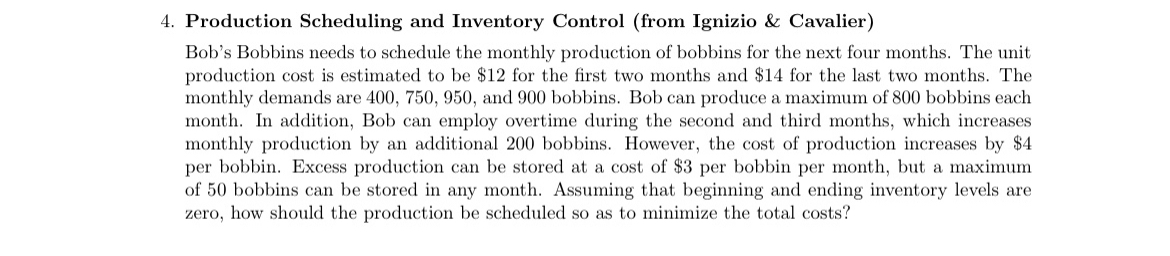

In [116]:
!pip install gurobipy

In [117]:
from gurobipy import *

In [118]:
m = Model('Prod and Invent')

In [119]:
#Problem Data

months = range(4)

demP = [400, 750, 950, 850]
overtimeCost = 4
storageCost = 3
prodCostP = [12,12,14,14]
prodCap = 800
overtimeCap = 200
storageCap = 50

In [120]:
# Variables

p = [None]*len(months)
o = [None]*len(months)
s = [None]*len(months)

for month in months:
  overtimeCostMonth = overtimeCost if month in [1,2] else 0
  p[month] = m.addVar(obj= (prodCostP[month] + overtimeCostMonth), vtype=GRB.INTEGER, name='production%d' % month)
  s[month] = m.addVar(obj= storageCost, vtype=GRB.INTEGER, name='storage%d' % month)
  if month in [1,2]:
    o[month] = m.addVar(obj = overtimeCost, vtype= GRB.INTEGER, name='overtime%d' % month)

In [121]:
m.update()

In [122]:
#Constraints

#demand
for month in months:
  if month in [1,2]:
    totalProduction = p[month] + o[month]
  else:
    totalProduction = p[month]

  if month > 0:
    m.addConstr(totalProduction + s[month-1] - s[month] == demP[month], 'demand%d' % month)
  else:
      m.addConstr(totalProduction == demP[month], 'demand%d' % month)

#Production capacity
for month in months:
  m.addConstr(p[month] <= prodCap, 'prodCap%d' % month)

#Inventory
for month in months:
  m.addConstr(s[month] <= storageCap, 'storageCap%d' % month)

#Overtime
if month in [1,2]:
  m.addConstr(o[month] <= overtimeCap, 'overtimeCap%d' % month)

#Start and end storage must be 0
m.addConstr(s[0] == 0, 's00%d')
m.addConstr(s[3] == 0, 's30%d')

<gurobi.Constr *Awaiting Model Update*>

In [123]:
m.ModelSense = 1

In [124]:
m.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 14 rows, 10 columns and 22 nonzeros
Model fingerprint: 0x7406d842
Variable types: 0 continuous, 10 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 1e+03]
Presolve removed 14 rows and 10 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 23150 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.315000000000e+04, best bound 2.315000000000e+04, gap 0.0000%


In [125]:
for v in m.getVars():
  if v.X > 0:
    print('%6s = %4.1f' % (v.VarName, v.X))
print()
print('Objective Value:', m.ObjVal)


production0 = 400.0
overtime1 = 750.0
storage2 = 50.0
overtime2 = 1000.0
production3 = 800.0

Objective Value: 23150.0
